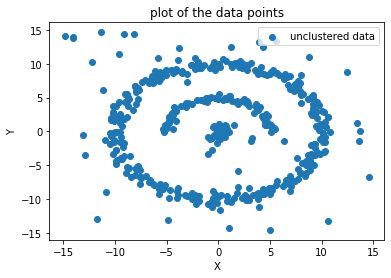

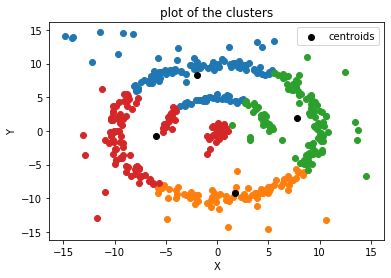

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
# %matplotlib inline

df = pd.read_csv('Dataset2.csv')
df_array = df.values

# df

k = 4 #2, 3, 4 #number of clusters
num_iter = 15 # 15, 50, 100, 500, 1000 #number of iterations
m, n = df.shape

#centroids:
centroids = np.zeros((k, n)) # = for k colors 
random_index = np.random.randint(0, m)
for i in range(k):
    centroids[i, 0] = df_array[random_index, 0]
    centroids[i, 1] = df_array[random_index, 1]

#euclidean distance:
def distance(x1, y1, x2, y2):
    dist = np.square(x1-x2) + np.square(y1-y2)
    dist = np.sqrt(dist)
    return dist

#k-means:

clusters = []

for iteration in range(num_iter):
    
    index_matrix = np.array([])
    flag = 0
    dic = {}
    for i in range(k):
        dic[i+1] = np.array([]).reshape(2, 0)
    
    for j in range(m):
        min_dist = 1000 #just a big value!
        for i in range(k):
            if(distance(df_array[j, 0], df_array[j, 1], centroids[i, 0], centroids[i, 1]) < min_dist):
                min_dist = distance(df_array[j, 0], df_array[j, 1], centroids[i, 0], centroids[i, 1])
                flag = i
            else:
                continue
        index_matrix = np.append(index_matrix, flag)
        dic[index_matrix[j] + 1] = np.c_[dic[index_matrix[j] + 1], df_array[j]]
        
    for i in range(k):
        dic[i+1] = dic[i+1].T
        
        
    #updating the centroids:
    for i in range(k):
        sum_x = 0
        sum_y = 0
        count = 0
        for j in range(m):
            if(index_matrix[j] == i):
                sum_x += df_array[j, 0]
                sum_y += df_array[j, 1]
                count += 1
        if(count == 0):
            count = 1
        centroids[i, 0] = sum_x/count
        centroids[i, 1] = sum_y/count
        
    clusters = dic

#now, we visualize the data:

#unclustered data:
plt.scatter(x = df_array[:, 0], y = df_array[:, 1], label = 'unclustered data') #color: c = 'black'
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('plot of the data points')
plt.show()

#clustered data:
# color = ['red', 'blue', 'green', 'yellow']
# labels = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
for i in range(k):
    plt.scatter(x = dic[i+1][:, 0], y = dic[i+1][:, 1]) #c = color[v], label = labels[v]
plt.scatter(x = centroids[:, 0], y = centroids[:, 1],  c = 'black', label = 'centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('plot of the clusters')
plt.show()

In [8]:
#..........................................#

In [9]:
#now if we calculate the errors from k=1 to k=14 we have: (exactly like what we did in part D for Dataset2.csv)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
# %matplotlib inline

df = pd.read_csv('Dataset2.csv')
df_array = df.values
# df


k_max = 15
clustering_error_matrix = np.array([])
for k in range(1, k_max):
    num_iter = 15 # 15, 50, 100, 500, 1000 #number of iterations
    m, n = df.shape

    #centroids:
    centroids = np.zeros((k, n)) # = for k colors 
    random_index = np.random.randint(0, m)
    for i in range(k):
        centroids[i, 0] = df_array[random_index, 0]
        centroids[i, 1] = df_array[random_index, 1]

    #euclidean distance:
    def distance(x1, y1, x2, y2):
        dist = np.square(x1-x2) + np.square(y1-y2)
        dist = np.sqrt(dist)
        return dist

    #k-means:

    clusters = []

    for iteration in range(num_iter):

        index_matrix = np.array([])
        flag = 0
        dic = {}
        for i in range(k):
            dic[i+1] = np.array([]).reshape(2, 0)

        for j in range(m):
            min_dist = 1000 #just a big value!
            for i in range(k):
                if(distance(df_array[j, 0], df_array[j, 1], centroids[i, 0], centroids[i, 1]) < min_dist):
                    min_dist = distance(df_array[j, 0], df_array[j, 1], centroids[i, 0], centroids[i, 1])
                    flag = i
                else:
                    continue
            index_matrix = np.append(index_matrix, flag)
            dic[index_matrix[j] + 1] = np.c_[dic[index_matrix[j] + 1], df_array[j]]

        for i in range(k):
            dic[i+1] = dic[i+1].T


        #updating the centroids:
        for i in range(k):
            sum_x = 0
            sum_y = 0
            count = 0
            for j in range(m):
                if(index_matrix[j] == i):
                    sum_x += df_array[j, 0]
                    sum_y += df_array[j, 1]
                    count += 1
            if(count == 0):
                count = 1
            centroids[i, 0] = sum_x/count
            centroids[i, 1] = sum_y/count

        clusters = dic


    #calculating the 'cluster-error' for each of the clusters:
    cluster_error_matrix = np.array([])
    for i in range(k):
        sum_distances = 0
        for r in range(len(dic[i+1])):
            sum_distances += distance(dic[i+1][r][0], dic[i+1][r][1], centroids[i][0], centroids[i][1])
        sum_distances /= len(dic[i+1])
        cluster_error_matrix = np.append(cluster_error_matrix, sum_distances)



    #Calculating the 'clustering-error', which basically is the average 'cluster-error':
    clustering_error = cluster_error_matrix.mean()
    
    
    #Calculating clustering_error_matrix to draw the 'Ellbow' curve:
    clustering_error_matrix = np.append(clustering_error_matrix, clustering_error)

In [11]:
clustering_error_matrix

array([8.65834515, 6.90859437, 5.42276448, 4.57250017, 4.0015166 ,
       3.46223344, 3.11856691, 2.81020561, 2.57693073, 2.38819549,
       2.21108515, 2.0560171 , 1.92384093, 1.80447115])

In [12]:
#as we can see above, the errors are way higher than Dataset1, where they ere around 0.3! 

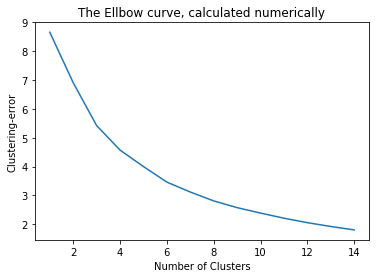

In [13]:
#visualising 'clustering-error' for different values of k, inorder to draw the 'Ellbow' curve:
k_array = np.arange(1, k_max, 1)
plt.plot(k_array, clustering_error_matrix)
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering-error')
plt.title('The Ellbow curve, calculated numerically')
plt.show()

In [14]:
#as we can see above, the Elbow curve is curvier and has less angles than that of the Dataset1.